In [1]:
import numpy as np
import pickle
import random
import ipdb
import torch
import os

In [2]:
def read_dataset():
    with open('dataset.pkl', 'rb') as f:
        npdata = pickle.load(f)
    with open('xiaohuangji.txt') as f:
        data = f.read().split('E\nM ')[1:]
        d = []
        for i in data:
            try:
                d.append(i.strip().split('\nM ')[1])
            except:
                d.append(i[2:])
        textdata = d
    assert len(textdata) == len(npdata)
    return textdata, npdata

In [3]:
text, npdata = read_dataset()
len(text), npdata.shape

(454131, (454131, 768))

In [4]:
def cosine_similarity(x, y):
    # x: [768]; y: [256, 768]
    x = np.dot(x, y.T) / np.linalg.norm(x) / np.linalg.norm(y, axis=1)
    return x

In [5]:
def average_similarity(x):
    return np.var(x)

In [6]:
def transform(x, tmp=0.05):
    # softmax with temperature
    y = x / tmp
    # ipdb.set_trace()
    y = torch.nn.functional.softmax(torch.tensor(y)).numpy()
    return y

## Show the negative transform

In [7]:
pool_size= 256
index = 73508
text[index]
negative_samples = random.sample(range(len(text)), pool_size)

text_negaitve_samples = [text[i] for i in negative_samples]
npdata_negative_samples = npdata[negative_samples]

In [8]:
similarity = cosine_similarity(npdata[index], npdata_negative_samples)
'average similarity:', average_similarity(similarity)

('average similarity:', 0.0026717621)

In [22]:
tmp=0.01
transformer_similarity = transform(similarity, tmp=tmp)
'average similarity:', average_similarity(transformer_similarity)

/data/lantian/miniconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


('average similarity:', 0.0009633536)

In [23]:
transformer_similarity.min(), transformer_similarity.mean(), transformer_similarity.max()

(2.3867374e-18, 0.0039062505, 0.48216233)

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

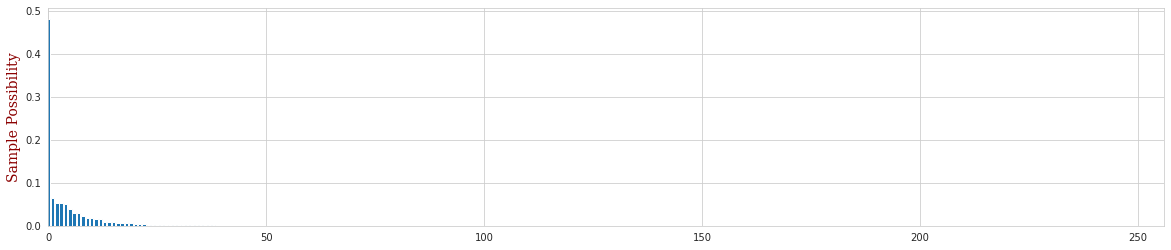

In [25]:
x = list(range(len(transformer_similarity)))
y = np.sort(transformer_similarity)[::-1]
fig = plt.figure(figsize=(20,4))
plt.bar(x, y)
plt.xlim(0, len(x))
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14}
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Sample Possibility', fontdict=font)
# plt.xlabel('Samples', fontdict=font)
# plt.title('Sample Possibility of 256 random samples', fontdict=font)
plt.savefig(f'weight{tmp}.eps', dpi=600, format='eps')